In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import category_encoders as ce
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#use when different features need different preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

#plt.style.use('belle2')

# Description of dataset

# EDA

## Essential elements for EDA (Documentation)

* [11 Essential Code Blocks for Complete EDA (Exploratory Data Analysis)-Regression Tas](https://towardsdatascience.com/11-simple-code-blocks-for-complete-exploratory-data-analysis-eda-67c2817f56cd)
* [Rapid-Fire EDA process using Python for ML Implementation](https://www.analyticsvidhya.com/blog/2021/04/rapid-fire-eda-process-using-python-for-ml-implementation/)
* [Exploratory Data Analysis (EDA) – Types and Tools](https://www.geeksforgeeks.org/exploratory-data-analysis-eda-types-and-tools/)


Tests

* Univariate (Non graphical) 
    - [ ] Check variable wise mean, median, skewness
    - [ ] Whether there are any missing valus or not?
    - [ ] Is there any duplicate rows?
    - [ ] Incorrect datatypes
        - [ ] Convert the datatypes to numerical.
        - [ ] For categorical dataset OneHotencoder
    - [ ] Is there any anomalies (Outliers?)
        - [ ] Very much important when we are going to perform any feature scaling



* Univariate  (graphical) 

    - [ ] Histogram for continuous function to understand the power of features to classify
         - [ ] Bar/count plot for categorical features
    - [ ] Box plot for checking outliers

* Bi/Multivariate

    - [ ] Check correlations
    - [ ] Pairplot


In [6]:
df = pd.read_csv('Heart.csv',index_col=0)

## Show few rows

<div class="girk">
What to look for

* Can you understand the column names? Do they make sense? (Check with the variable definitions again if needed)
* Do the values in these columns make sense?
* Are there significant missing values (NaN) sighted?
* What types of classes do the categorical features have?</div><i class="fa fa-lightbulb-o "></i>

In [5]:
df.head()

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
1   63    1       typical     145   233    1        2    150      0      2.3   
2   67    1  asymptomatic     160   286    0        2    108      1      1.5   
3   67    1  asymptomatic     120   229    0        2    129      1      2.6   
4   37    1    nonanginal     130   250    0        0    187      0      3.5   
5   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
1      3  0.0       fixed   No  
2      2  3.0      normal  Yes  
3      2  2.0  reversable  Yes  
4      3  0.0      normal   No  
5      1  0.0      normal   No

## mean, median, min/max

In [53]:
df.describe()

Age         Sex      RestBP        Chol         Fbs     RestECG  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868  131.689769  246.693069    0.148515    0.990099   
std      9.038662    0.467299   17.599748   51.776918    0.356198    0.994971   
min     29.000000    0.000000   94.000000  126.000000    0.000000    0.000000   
25%     48.000000    0.000000  120.000000  211.000000    0.000000    0.000000   
50%     56.000000    1.000000  130.000000  241.000000    0.000000    1.000000   
75%     61.000000    1.000000  140.000000  275.000000    0.000000    2.000000   
max     77.000000    1.000000  200.000000  564.000000    1.000000    2.000000   

            MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  299.000000  
mean   149.607261    0.326733    1.039604    1.600660    0.672241  
std     22.875003    0.469794    1.161075    0.616226    0.937438  
min     71.000000    0.000000    0.000000    1.000000    0.000000  
25%    133.500000    0.000000    0.000000    1.000000    0.000000  
50%    153.000000    0.000000    0.800000    2.000000    0.000000  
75%    166.000000    1.000000    1.600000    2.000000    1.000000  
max    202.000000    1.000000    6.200000    3.000000    3.000000

## Check whether any duplicate row or not

In [74]:
df[df.duplicated()]

Empty DataFrame
Columns: [Age, Sex, ChestPain, RestBP, Chol, Fbs, RestECG, MaxHR, ExAng, Oldpeak, Slope, Ca, Thal, AHD]
Index: []

<span class="girk">No duplicate row</span>

## Check missing values

1. [All You Need To Know About Different Types Of Missing Data Values And How To Handle It
](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/)

2. [Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html)

In [36]:
# How much fraction of total training dataset is nan
df.isna().any(axis=1).sum()/df.shape[0]
# Only ~2%

0.019801980198019802

In [37]:
# which are the columns have nan value?
df.isna().any()
# ['Ca', 'Thal']

Age          False
Sex          False
ChestPain    False
RestBP       False
Chol         False
Fbs          False
RestECG      False
MaxHR        False
ExAng        False
Oldpeak      False
Slope        False
Ca            True
Thal          True
AHD          False
dtype: bool

In [40]:
df['Ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [41]:
df['Thal'].value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

<span class="girk">Both the variable is categorical. The NaN is only ~2%. Let's impute them with most frequent entry</span>

In [68]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [69]:
df_ = pd.DataFrame(imp.fit_transform(df))
df.isna().any(axis=1).sum()/df.shape[0]

0.019801980198019802

<div class="girk">
All missing values has been imputed</div><i class="fa fa-lightbulb-o "></i>

## Check datatypes  and encoding

In [9]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

<div class="girk">

There are three non-numerical columns. 
    
* ChestPain
* Thal 
* AHD </div><i class="fa fa-lightbulb-o "></i>

In [19]:
df['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [21]:
df['Thal'].value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [22]:
df['AHD'].value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

<div class="burk">
Q? What kind of encoder should I use? Are they categorical? Seems no. Then how to arrange them, how to encode, in order to avoid any numerical bias?</div><i class="fa fa-lightbulb-o "></i>

All about encoding

* [6 Ways to Encode Features for Machine Learning Algorithms](https://towardsdatascience.com/6-ways-to-encode-features-for-machine-learning-algorithms-21593f6238b0)
* [Feature Encoding Techniques – Machine Learning](https://www.geeksforgeeks.org/feature-encoding-techniques-machine-learning/)
* [Here’s All you Need to Know About Encoding Categorical Data (with Python code)](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)
* [Difference between ordinal and label encoder](https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder)
* [An Easier Way to Encode Categorical Features](https://towardsdatascience.com/an-easier-way-to-encode-categorical-features-d840ff6b3900)
* [Youtube](https://www.youtube.com/watch?v=OTPz5plKb40)

A. Binary: Either/or 
Examples: 

    Yes, No
    True, False

B. Ordinal: Specific ordered Groups.

```
from sklearn.preprocessing import LabelEncoder    # for target
from sklearn.preprocessing import OrdinalEncoder  # for features
from category_encoder import OrdinalEncoder       # out side sklearn
```
Examples: 

    low, medium, high
    cold, hot, lava Hot

C. Nominal: Unordered Groups. Examples 
```
sklearn.preprocessing.OneHotEncoder()
```
    cat, dog, tiger
    pizza, burger, coke

Univariate  `SimpleImputer` and  Multivariate Imputation`IterativeImputer`, Nearest neighbour imputation `KNNImputer`


### target

In [33]:
# Yes/ No -> 1/0
df_encoded = df.copy()
df_encoded.loc[:, 'AHD'] = df_encoded.apply(lambda Z: 1 if Z['AHD'] == 'Yes' else 0, axis=1)
df_encoded

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
1     63    1       typical     145   233    1        2    150      0   
2     67    1  asymptomatic     160   286    0        2    108      1   
3     67    1  asymptomatic     120   229    0        2    129      1   
4     37    1    nonanginal     130   250    0        0    187      0   
5     41    0    nontypical     130   204    0        2    172      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
299   45    1       typical     110   264    0        0    132      0   
300   68    1  asymptomatic     144   193    1        0    141      0   
301   57    1  asymptomatic     130   131    0        0    115      1   
302   57    0    nontypical     130   236    0        2    174      0   
303   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca        Thal  AHD  
1        2.3      3  0.0       fixed    0  
2        1.5      2  3.0      normal    1  
3        2.6      2  2.0  reversable    1  
4        3.5      3  0.0      normal    0  
5        1.4      1  0.0      normal    0  
..       ...    ...  ...         ...  ...  
299      1.2      2  0.0  reversable    1  
300      3.4      2  2.0  reversable    1  
301      1.2      2  1.0  reversable    1  
302      0.0      2  1.0      normal    1  
303      0.0      1  NaN      normal    0  

[303 rows x 14 columns]

### Ordinal

<span class="burk">normal -> reversable -> fixed</span>

In [48]:
mapping = [{'col': 'Thal', 'mapping': {"normal ": 0,  "reversable": 1, "fixed": 2}}]
ce.OrdinalEncoder(cols=['Thal'], mapping=mapping).fit_transform(df)

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
1     63    1       typical     145   233    1        2    150      0   
2     67    1  asymptomatic     160   286    0        2    108      1   
3     67    1  asymptomatic     120   229    0        2    129      1   
4     37    1    nonanginal     130   250    0        0    187      0   
5     41    0    nontypical     130   204    0        2    172      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
299   45    1       typical     110   264    0        0    132      0   
300   68    1  asymptomatic     144   193    1        0    141      0   
301   57    1  asymptomatic     130   131    0        0    115      1   
302   57    0    nontypical     130   236    0        2    174      0   
303   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca  Thal  AHD  
1        2.3      3  0.0   2.0   No  
2        1.5      2  3.0  -1.0  Yes  
3        2.6      2  2.0   1.0  Yes  
4        3.5      3  0.0  -1.0   No  
5        1.4      1  0.0  -1.0   No  
..       ...    ...  ...   ...  ...  
299      1.2      2  0.0   1.0  Yes  
300      3.4      2  2.0   1.0  Yes  
301      1.2      2  1.0   1.0  Yes  
302      0.0      2  1.0  -1.0  Yes  
303      0.0      1  NaN  -1.0   No  

[303 rows x 14 columns]

In [52]:
mapping = [{'col': 'ChestPain', 'mapping': {"asymptomatic ": 0,  "nonanginal": 1, "nontypical": 2, "typical":3}}]
ce.OrdinalEncoder(cols=['ChestPain'], mapping=mapping).fit_transform(df)

Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
1     63    1        3.0     145   233    1        2    150      0      2.3   
2     67    1       -1.0     160   286    0        2    108      1      1.5   
3     67    1       -1.0     120   229    0        2    129      1      2.6   
4     37    1        1.0     130   250    0        0    187      0      3.5   
5     41    0        2.0     130   204    0        2    172      0      1.4   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
299   45    1        3.0     110   264    0        0    132      0      1.2   
300   68    1       -1.0     144   193    1        0    141      0      3.4   
301   57    1       -1.0     130   131    0        0    115      1      1.2   
302   57    0        2.0     130   236    0        2    174      0      0.0   
303   38    1        1.0     138   175    0        0    173      0      0.0   

     Slope   Ca        Thal  AHD  
1        3  0.0       fixed   No  
2        2  3.0      normal  Yes  
3        2  2.0  reversable  Yes  
4        3  0.0      normal   No  
5        1  0.0      normal   No  
..     ...  ...         ...  ...  
299      2  0.0  reversable  Yes  
300      2  2.0  reversable  Yes  
301      2  1.0  reversable  Yes  
302      2  1.0      normal  Yes  
303      1  NaN      normal   No  

[303 rows x 14 columns]

## Univariate  grapical

### Distribution for continuous features and checking for outlier

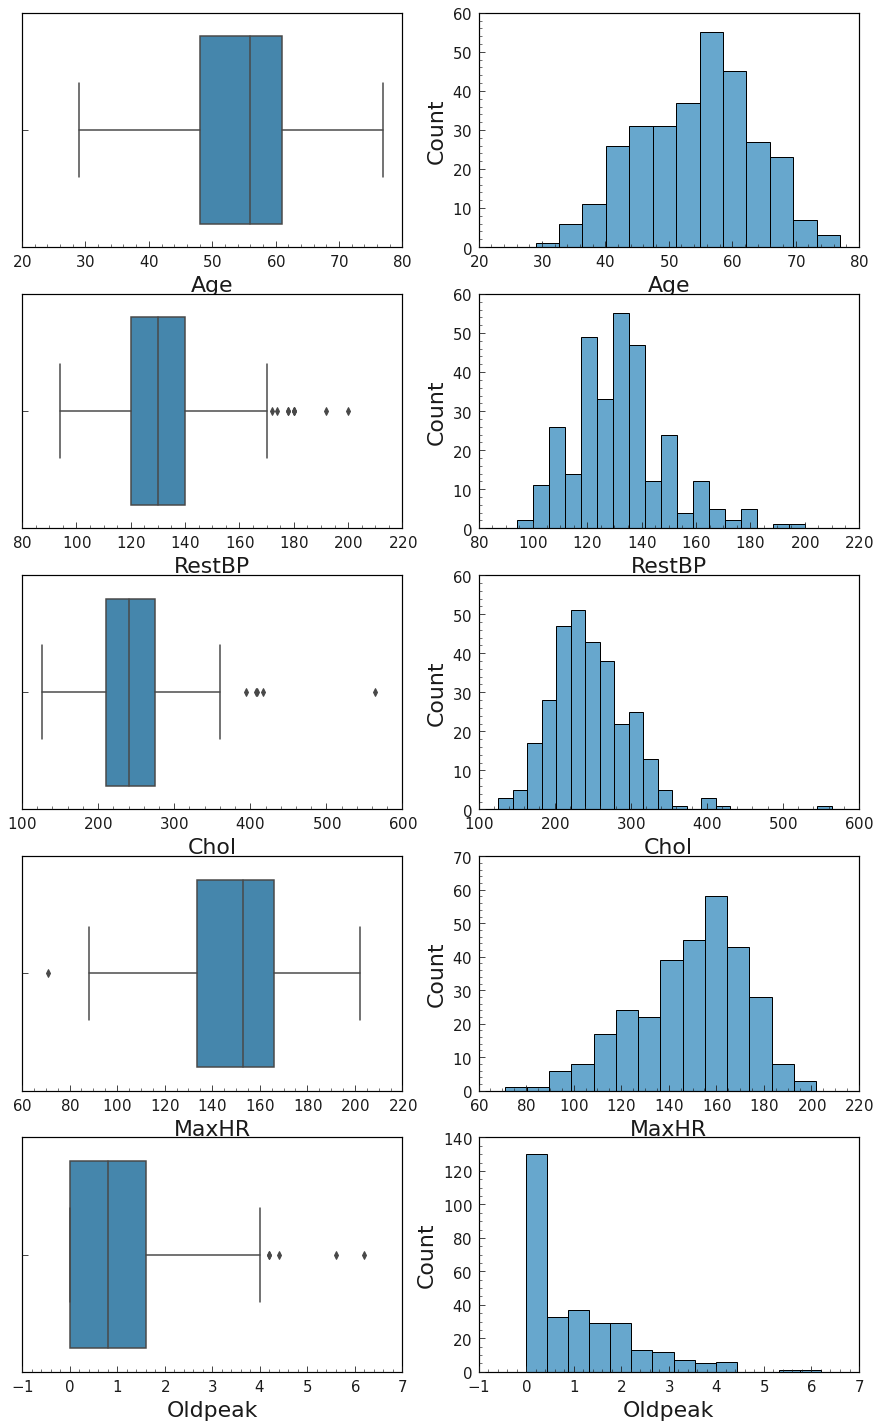

In [123]:
fig, ax = plt.subplots(5, 2, figsize = (15, 25))
sns.boxplot(data=df, x= df["Age"], ax = ax[0,0])
sns.histplot(df['Age'], ax = ax[0,1])

sns.boxplot(data=df, x= df["RestBP"], ax = ax[1,0])
sns.histplot(df['RestBP'], ax = ax[1,1])

sns.boxplot(data=df, x= df["Chol"], ax = ax[2,0])
sns.histplot(df['Chol'], ax = ax[2,1])

sns.boxplot(data=df, x= df["MaxHR"], ax = ax[3,0])
sns.histplot(df['MaxHR'], ax = ax[3,1])

sns.boxplot(data=df, x= df["Oldpeak"], ax = ax[4,0])
sns.histplot(df['Oldpeak'], ax = ax[4,1])


plt.show()

<span class="burk">Number of outliers are realy small. No special tratment is taken for now</span>

### Count for categorical features

<span class="burk">
What to look out for:
    
* Sparse classes which have the potential to affect a model’s performance.
* Mistakes in labeling of the classes, for example 2 exact classes with minor spelling differences.

</span>

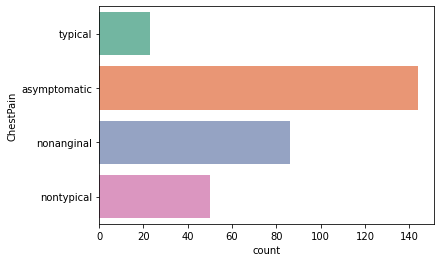

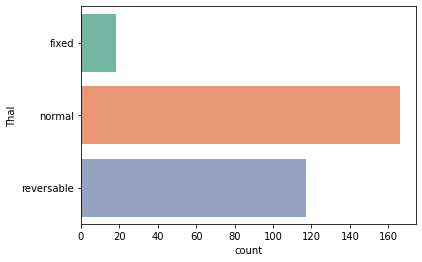

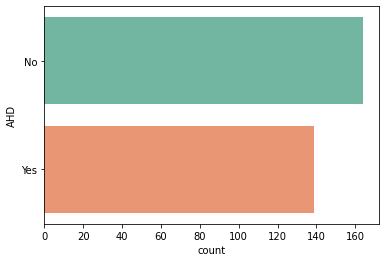

In [22]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=df,linewidth=2,palette= 'Set2')
        plt.show()

### count plot per class 

<span class="girk">
    what to check:

whether any feature directly related to class (for categorical feature)
</span>

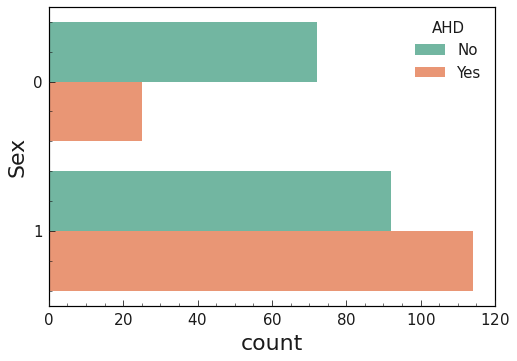

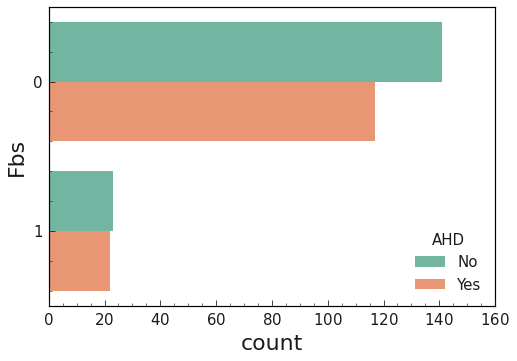

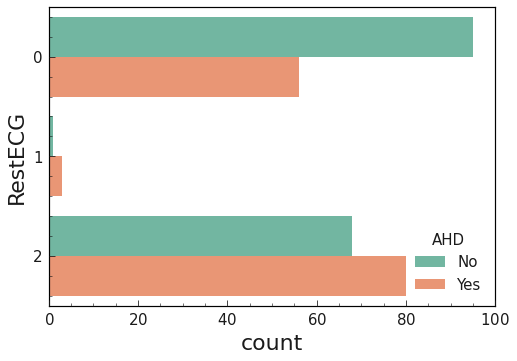

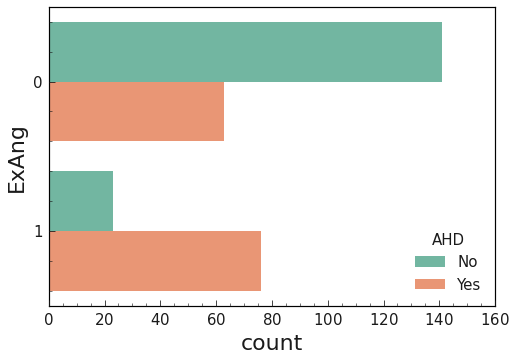

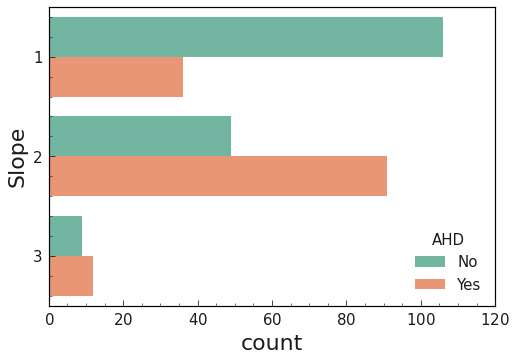

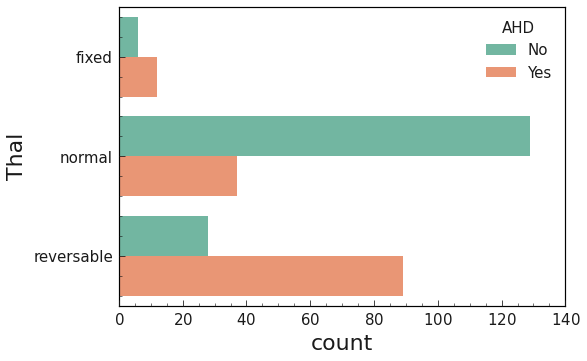

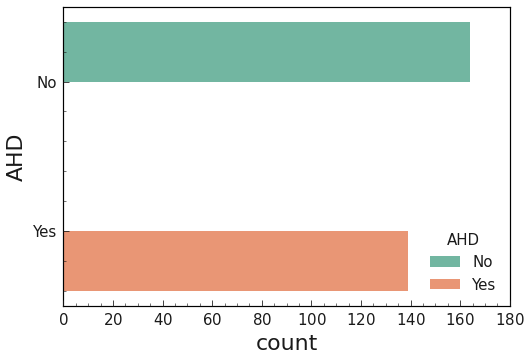

In [121]:
for col in df.columns.tolist():
    if len(df[col].value_counts().tolist()) < 4:
        sns.countplot(hue = 'AHD', y=col, data=df,linewidth=2,palette= 'Set2')
        plt.show()

<div class="girk">
Insights:
    
* Male are more prone to heart disease
* `Thal == normal`, `Slope == 1`, `ExAng==0` is found to be quite reliable parameter for not having heart disease while `RestECG==0` is not so reliable 

</div><i class="fa fa-lightbulb-o "></i>

### Histogram per class (for continuous variable)

<span class="girk">What to check:
    Any feature that strongly separate two classes</span>

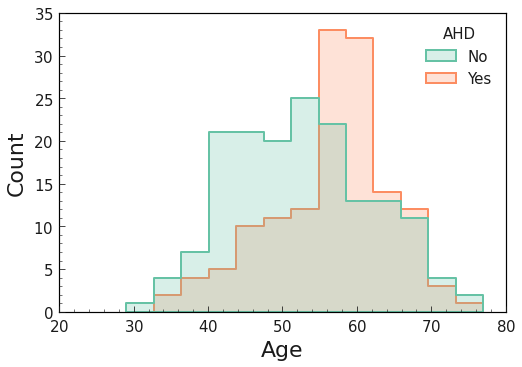

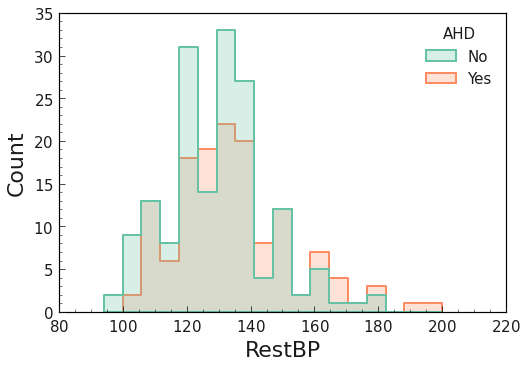

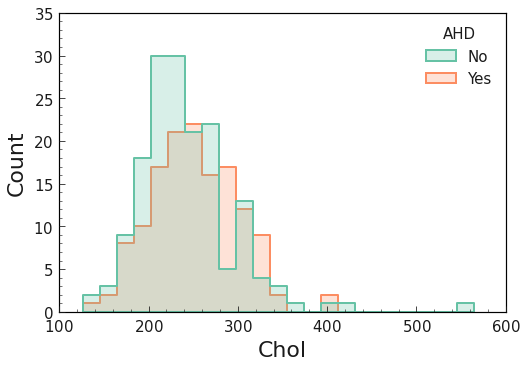

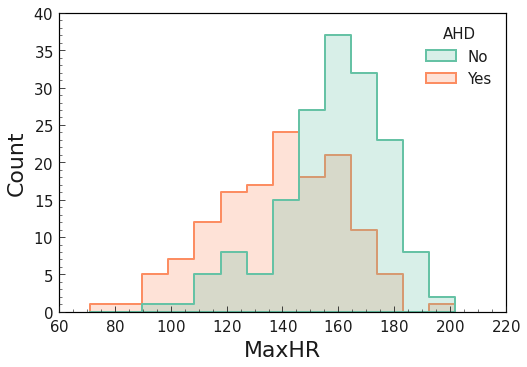

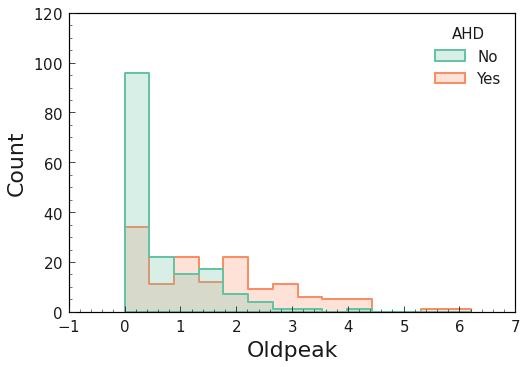

In [129]:
for col in df.columns.tolist():
    if len(df[col].value_counts().tolist()) > 4:
        sns.histplot(hue = 'AHD', x=col, data=df,linewidth=2,palette= 'Set2',element="step")
        
        plt.show()

<span class="girk">
Insights: 

* After `Age > 55` heart attck chances increase sharply
* `MaxHR > 140` is quite good indicator of having heart attack
* `Oldpeak ~ 0`  has chances of not having heart attack
</span>

## Multivariate EDA

### Correlation

<span class="girk">
    What to look out for:

* Strongly correlated features; either dark red (positive) or dark blue(negative).
* Target variable (regression); If it has strong positive or negative relationships with other features.

</span>

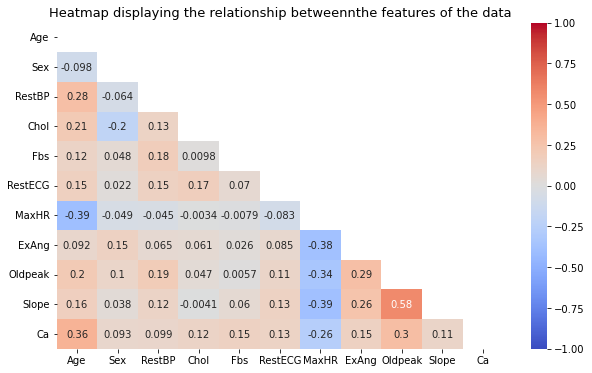

In [25]:
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap=plt.cm.coolwarm,annot=True,vmin=-1, vmax=1,mask=mask )
plt.title('Heatmap displaying the relationship betweennthe features of the data', fontsize=13)
plt.show()

<span class="burk">

* OldPeak and Slope has highest correlation, which is just 0.58
* MaxHR is negetively correlated to few other variables but not more than 0.4
* So none of them to be discarded because of high correlation
</span>

### Pairplot

<span class="girk">
    
Pairplot is used 

* to check relationship between variables, 
* linearity of decision boundary
</span>

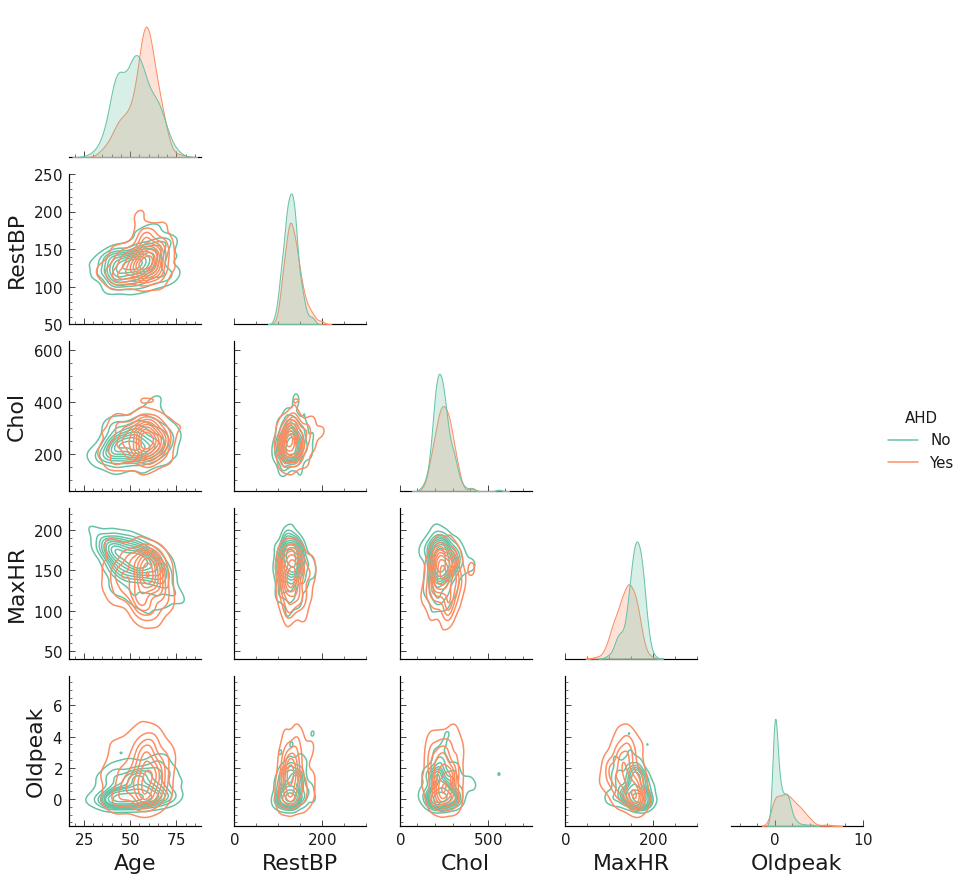

In [173]:
columns = [col for col in df.columns.tolist() if len(df[col].value_counts().tolist()) > 4]
columns.append('AHD')
sns.pairplot(df[columns], hue='AHD', palette= 'Set2',kind="kde",corner=True)

<span class="girk">No non-linear boundary found</span>


## EDA automatically by code

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Heart disease dataset')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
profile.to_file("Analysis.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span class="girk">The EDA report can be automatically generated and conclusion can be drawn with much more easier way
Find the report [HERE</span>](Analysis.html)

# Plotting to explore any non-linearity is there or not

<span class="burk">Why use SVM (kernel) not linear</span>

# MVA training

## train test split

In [11]:
X = df.drop(['AHD'], axis=1)#.to_numpy()
y = df.apply(lambda Z: 1 if Z['AHD'] == 'Yes' else 0, axis=1)

In [12]:
features = X.columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = ['Age', 'RestBP', 'Chol','MaxHR', 'Oldpeak']#X.select_dtypes(exclude='object').columns.tolist()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2,random_state=20)

## SVM Model

### Pipeline/column_trasfer make_pipeline/make_column_trasfer

![pipelin](pipi.png)

In [195]:

mapping1 = [{'col': 'Thal', 'mapping': {"normal ": 0,  "reversable": 1, "fixed": 2}}]
mapping2 = [{'col': 'ChestPain', 'mapping': {"asymptomatic ": 0,  "nonanginal": 1, "nontypical": 2,\
                                             "typical":3}}]


column_trans = make_column_transformer(
#    (SimpleImputer(missing_values=np.nan, strategy='most_frequent'),['Ca','Thal']),
    (OneHotEncoder(), ['Thal','ChestPain']),
    (StandardScaler(), numerical_features),
    
    #(OrdinalEncoder(),['Thal','ChestPain']),
    #(ce.OrdinalEncoder(mapping=mapping1),['Thal']),
    #(ce.OrdinalEncoder(mapping=mapping2),['ChestPain']),   
    remainder='passthrough')

pipe = make_pipeline(column_trans,
                     SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                     SVC(C=1, kernel='linear') 
                    )


In [196]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Thal', 'ChestPain']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'RestBP', 'Chol',
                                                   'MaxHR', 'Oldpeak'])])),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('svc', SVC(C=1, kernel='linear'))])

In [202]:
prediction_test=pipe.predict(X_test)
print('The testing data score is ',"{:.3f}".format(metrics.accuracy_score(prediction_test,y_test)))

The testing data score is  0.852


In [199]:
prediction_train=pipe.predict(X_train)
print('The testing data score is ',"{:.3f}".format(metrics.accuracy_score(prediction_train,y_train)))

The testing data score is  0.868


In [200]:
print('The average accuracy data score is ',"{:.3f}".format(cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()))

The average accuracy data score is  0.822


## Try non linear kernel

<span class="girk">Seems nonlinear kernel is very sensitive to hyperparameter</span>

In [19]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Thal','ChestPain']),
    (StandardScaler(), numerical_features),
    remainder='passthrough')
pipe = make_pipeline(column_trans,
                     SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                     #SVC(C=0.5,kernel='rbf', gamma=1.0,) 
                     SVC(kernel='poly', degree=2, C=0.1, coef0 = 1)
                    )
pipe.fit(X_train,y_train)
prediction_test=pipe.predict(X_test)
print('The testing data score is ',"{:.3f}".format(metrics.accuracy_score(prediction_test,y_test)))
prediction_train=pipe.predict(X_train)
print('The training data score is ',"{:.3f}".format(metrics.accuracy_score(prediction_train,y_train)))
print('The average accuracy data score is ',"{:.3f}".format(cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()))

The testing data score is  0.869
The training data score is  0.860
The average accuracy data score is  0.845


In [18]:
from sklearn.linear_model import LogisticRegression

column_trans = make_column_transformer(
    (OneHotEncoder(), ['Thal','ChestPain']),
    (StandardScaler(), numerical_features),
    remainder='passthrough')
pipe = make_pipeline(column_trans,
                     SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                     (LogisticRegression())
                    )
pipe.fit(X_train,y_train)
prediction_test=pipe.predict(X_test)
print('The testing data score is ',"{:.3f}".format(metrics.accuracy_score(prediction_test,y_test)))
prediction_train=pipe.predict(X_train)
print('The training data score is ',"{:.3f}".format(metrics.accuracy_score(prediction_train,y_train)))
print('The average accuracy data score is ',"{:.3f}".format(cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()))

The testing data score is  0.885
The training data score is  0.864
The average accuracy data score is  0.828


## Try decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

column_trans = make_column_transformer(
    (OneHotEncoder(), ['Thal','ChestPain']),
    (StandardScaler(), numerical_features),
    remainder='passthrough')
pipe = make_pipeline(column_trans,
                     SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                     DecisionTreeClassifier(max_depth = 3, random_state = 1)
                    )
pipe.fit(X_train,y_train)
prediction_test=pipe.predict(X_test)
print('The testing data score is ',"{:.3f}".format(metrics.accuracy_score(prediction_test,y_test)))
prediction_train=pipe.predict(X_train)
print('The training data score is ',"{:.3f}".format(metrics.accuracy_score(prediction_train,y_train)))
print('The average accuracy data score is ',"{:.3f}".format(cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()))

The testing data score is  0.836
The training data score is  0.860
The average accuracy data score is  0.805


## ROC plot

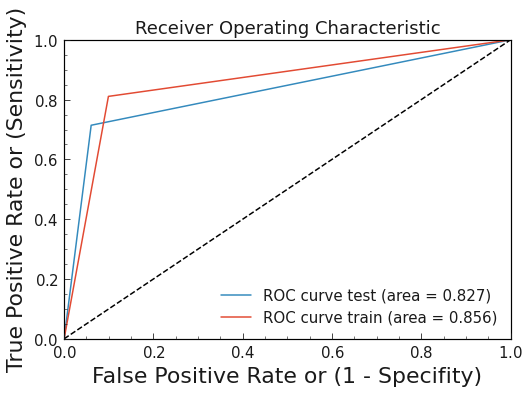

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

prediction_test=pipe.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prediction_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve test (area = %0.3f)' % roc_auc)

prediction_train=pipe.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, prediction_train)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve train (area = %0.3f)' % roc_auc)


plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc.png')
plt.show()

* [<span class="burk">Why this isn't smooth?</span>](https://stats.stackexchange.com/questions/263121/why-are-the-roc-curves-not-smooth)
    * We should use confidence or probability instead of threshold
    * The function `roc_curve` find unique predicted value and find **tpr** and **fpr** for those threshold value. For the case of only {0,1} it puts 0,1,2. Attribute `thresholds[0]` represents no instances being predicted and is arbitrarily set to `max(y_score) + 1`.

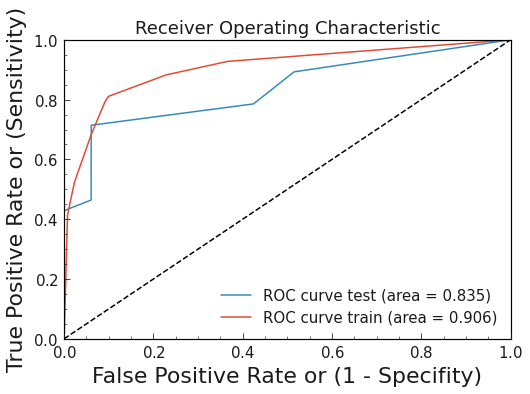

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

prediction_test=pipe.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prediction_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve test (area = %0.3f)' % roc_auc)

prediction_train=pipe.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, prediction_train)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve train (area = %0.3f)' % roc_auc)


plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

In [240]:
#pip install scikit-plot

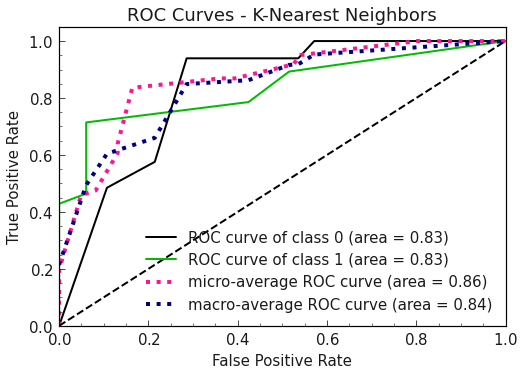

In [86]:
import scikitplot as skplt
y_proba = pipe.predict_proba(X=X_test)
plot = skplt.metrics.plot_roc(y_test, y_proba)
plt.title("ROC Curves - K-Nearest Neighbors")
plt.show()

## LDA Model

Reference

* [Stat Quest](https://www.youtube.com/watch?v=azXCzI57Yfc)
* [Page](https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_2_Linear_Discriminant_Analysis.php) 

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

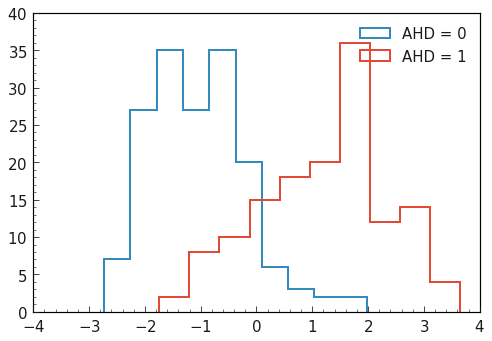

In [111]:
clf = LinearDiscriminantAnalysis(solver='svd')
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Thal','ChestPain']),
    (StandardScaler(), numerical_features),
    remainder='passthrough')
pipe = make_pipeline(column_trans,
                     SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                     (clf)
                    )
y_pred = pipe.fit_transform(X, y)
plt.hist(y_pred[y == 0], histtype='step', lw=2, label='AHD = 0')
plt.hist(y_pred[y == 1], histtype='step', lw=2, label='AHD = 1')
plt.legend()
plt.show()

In [114]:
clf = LinearDiscriminantAnalysis(solver='svd')
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Thal','ChestPain']),
    (StandardScaler(), numerical_features),
    remainder='passthrough')
pipe = make_pipeline(column_trans,
                     SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                     (clf)
                    )
pipe.fit(X_train,y_train)
prediction_test=pipe.predict(X_test)
print('The testing data score is ',"{:.3f}".format(metrics.accuracy_score(prediction_test,y_test)))
prediction_train=pipe.predict(X_train)
print('The training data score is ',"{:.3f}".format(metrics.accuracy_score(prediction_train,y_train)))
print('The average accuracy data score is ',"{:.3f}".format(cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()))

The testing data score is  0.869
The training data score is  0.860
The average accuracy data score is  0.828


# Tune hyperparameters

To do

* Tune hyperparameters, and find out maximum performance for LDA, linear and nonlinear kernels
* Then compare those maximum performing classifiers 

# Compare classifiers

In [218]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2,random_state=20)

def make_roc(classifier,X_train, X_test, y_train, y_test, classifier_name, train_roc=False):
    column_trans = make_column_transformer(
        (OneHotEncoder(), ['Thal','ChestPain']),
        (StandardScaler(), numerical_features),
        remainder='passthrough')
    pipe = make_pipeline(column_trans,
                         SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
                         (classifier)
                        )
    pipe.fit(X_train,y_train)
    if not train_roc:
        prediction_test=pipe.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, prediction_test)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC (%s ) area = %0.3f)' % (classifier_name,roc_auc), lw=2)
        plt.legend()
    else:
        prediction_train=pipe.predict_proba(X_train)[:,1]
        fpr, tpr, thresholds = roc_curve(y_train, prediction_train)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC (%s ) area = %0.3f)' % (classifier_name,roc_auc),lw=2)
        plt.legend()
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')

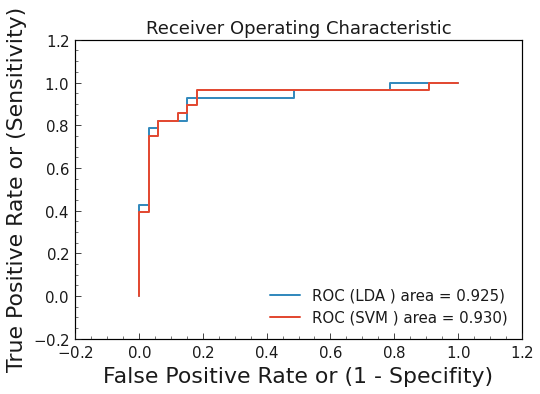

In [222]:
make_roc( LinearDiscriminantAnalysis(solver='svd'),X_train, X_test, y_train, y_test, classifier_name='LDA')
# turning on probability options which eventually slowdown training by performing crossvalidation to get smooth ROC
make_roc( SVC(C=0.1, kernel='linear', probability=True) ,X_train, X_test, y_train, y_test,classifier_name='SVM')

#make_roc( SVC(C=1,kernel='rbf', gamma=1.0, probability=True) ,X_train, X_test, y_train, y_test,classifier_name=r'rbf ($\gamma = 1$)')
#make_roc( SVC(C=1,kernel='rbf', gamma=1e-3, probability=True) ,X_train, X_test, y_train, y_test,classifier_name=r'rbf ($\gamma = 10^{-3}$)')


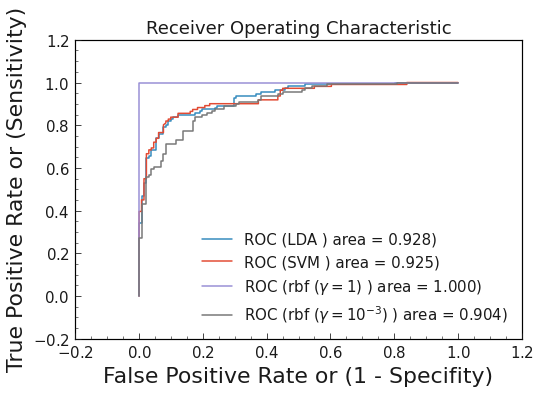

In [217]:
make_roc( LinearDiscriminantAnalysis(solver='svd'),X_train, X_test, y_train, y_test, classifier_name='LDA', train_roc=True)
# turning on probability options which eventually slowdown training by performing crossvalidation to get smooth ROC
make_roc( SVC(C=1, kernel='linear', probability=True) ,X_train, X_test, y_train, y_test,classifier_name='SVM', train_roc=True)
make_roc( SVC(C=1,kernel='rbf', gamma=1.0, probability=True) ,X_train, X_test, y_train, y_test,
         classifier_name=r'rbf ($\gamma = 1$)',train_roc=True)
make_roc( SVC(C=1,kernel='rbf', gamma=1e-3, probability=True) ,X_train, X_test, y_train, y_test,
         classifier_name=r'rbf ($\gamma = 10^{-3}$)',train_roc=True)



# Future to do

* Tune hyperparameters along with preprocessing
* Check what is done in ISLR book with this dataset(ISLR 9.3.3)
* Check what has done in Kaggle other notebook